### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [35]:
df = pd.read_csv('./data/coupons.csv')

In [36]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [37]:
# print out additional information about the dataset.
print(df.shape)
print(df.info())

(12684, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12

2. Investigate the dataset for missing or problematic data.

In [38]:
#check for missing values
print(df.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [42]:
# The column passenger is mispeelled. correct it so graphs come out corectly labelled
# Rename the column 'passanger' to 'passenger'
df.rename(columns={'passanger': 'passenger'}, inplace=True)
# The columns, Car, Bar, CoffeeHouse, CarryWay, RestaaurantLessThan20, Restaraunt20To50 have missing values. 
# the car column is pretty useless, with 12576 missing values, so do nothing about it right now.
# Later in the assignment, we have to do analysis based on values in the Bar column,
# print all the unique values that occur in the bar column, so we have an understanding of the column values
print(df['Bar'].unique())
# Replace missing values with "never" 
df['Bar'] = df['Bar'].fillna("never")

['never' 'less1' '1~3' 'gt8' '4~8']


4. What proportion of the total observations chose to accept the coupon?



In [43]:
# Calculate the percentage of observations that accepted the coupon, by summing the Y column and dividng by total rows
acceptance_rate = (df['Y'].sum() / df.shape[0]) * 100

# Print the result, truncate to 2 decimal places
print(f"Percentage of total observations that accepted the coupon: {acceptance_rate:.2f}%")

Percentage of total observations that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

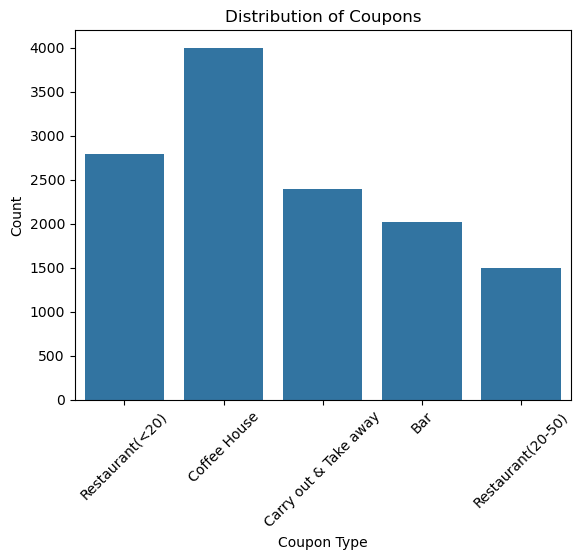

<Figure size 640x480 with 0 Axes>

In [44]:
sns.countplot(x='coupon', data=df)
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
plt.savefig('./plots/couponsbarplot.png')

6. Use a histogram to visualize the temperature column.

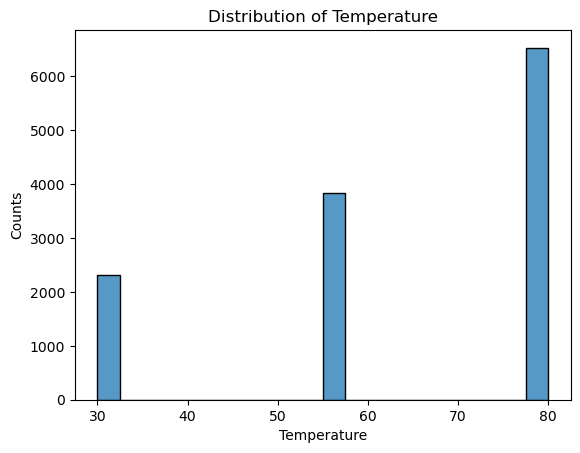

<Figure size 640x480 with 0 Axes>

In [45]:
sns.histplot(df['temperature'], bins=20)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.show()
plt.savefig('./plots/temperaturehistplot.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [47]:
# Create a new DataFrame that contains only the bar coupons
bar_coupons_df = df[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [48]:
# Calculate the proportion of bar coupons that were accepted
bar_acceptance_rate = (bar_coupons_df['Y'].sum() / bar_coupons_df.shape[0]) * 100
# Print the result
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2f}%")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [51]:
# Create two groups based on the number of times they go to a bar
group_fewer_than_3 = bar_coupons_df[(bar_coupons_df['Bar'] =='never')| (bar_coupons_df['Bar'] =='less1') 
                                    | (bar_coupons_df['Bar'] =='1~3') ]
group_more_than_3 = bar_coupons_df[(bar_coupons_df['Bar'] =='gt8')| (bar_coupons_df["Bar"] =='4~8')]

# Calculate the acceptance rate for each group
acceptance_rate_fewer_than_3 = (group_fewer_than_3['Y'].sum() / group_fewer_than_3.shape[0]) * 100
acceptance_rate_more_than_3 = (group_more_than_3['Y'].sum() / group_more_than_3.shape[0]) * 100

# Print the results
print(f"Acceptance rate for those who go to a bar 3 or fewer times a month: {acceptance_rate_fewer_than_3:.2f}%")
print(f"Acceptance rate for those who go to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")

Acceptance rate for those who go to a bar 3 or fewer times a month: 37.07%
Acceptance rate for those who go to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [54]:
#Looking at the data set, age has the following unique values:['21' '46' '26' '31' '41' '50plus' '36' 'below21']
# So we can filter filter to drivers who go to a bar more than once a mongh, and those ove 25 as follows
drivers_over25_bar1plus = df[(df['age'] != 'below21') & (df['age'] != '21') & (df['Bar'] != 'never') & (df['Bar'] != 'less1')]
#calculate the acceptance rate for this group
acceptance_rate_drivers_over25_bar1plus = (drivers_over25_bar1plus['Y'].sum() / drivers_over25_bar1plus.shape[0]) * 100
# Print the result
print(f"Acceptance rate for drivers over 25 who go to a bar more than once a month: {acceptance_rate_drivers_over25_bar1plus:.2f}%")


Acceptance rate for drivers over 25 who go to a bar more than once a month: 62.15%


Yes the drivers that go to a bar more than once a month is markedly higher (62.15%), than the overall acceptance rate for bar coupons (41%)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [68]:
# The passenger column has the following unique values: ['friend' 'child' 'partner' 'otheradult' 'self']
filtered_drivers = df.query(
    "Bar != 'never' and Bar != 'less1' and passenger == 'Kid(s)' and "
    "occupation not in ['farming', 'fishing', 'forestry']"
)

acceptance_rate_filtered = (filtered_drivers['Y'].sum() / filtered_drivers.shape[0]) * 100
# Print the result
print(f"Filtered Acceptance rate : {acceptance_rate_filtered:.2f}%")

Filtered Acceptance rate : 60.40%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [77]:

#Unique values for RestaurantLessThan20 are ['4~8' '1~3' 'less1' 'gt8' nan 'never']

#unique values for Income are ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
# '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
# 'Less than $12500']

#use these values to construct a query to filter the data set
filtered_drivers = df.query(
    "(Bar != 'never' and Bar != 'less1' and passenger != 'Kid(s)' and maritalStatus != 'Widowed') or "
    "(Bar != 'never' and Bar != 'less1' and age not in ['below21', '21', '26']) or"
    "(RestaurantLessThan20 in ['4~8','gt8'] and income in ['Less than $12500','$12500 - $24999', '$25000 - $37499','$37500 - $49999'])"
)
acceptance_rate_filtered = (filtered_drivers['Y'].sum() / filtered_drivers.shape[0]) * 100
# Print the result
print(f"Filtered Acceptance rate : {acceptance_rate_filtered:.2f}%")

Filtered Acceptance rate : 60.37%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The acceptance rate is signficantly higher than the general population ( 41 %, vs ~60 % ) for drivers who go to a bar more than once a month vs. the general population. This acceptance rate does not very much based on other factors.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let us explore the relationship between Coupon acceptance, the destination being driven to and the passenger.

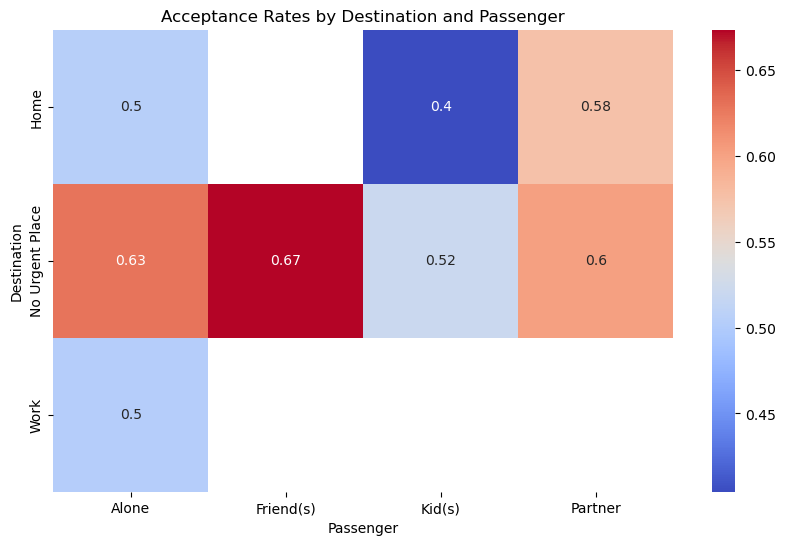

<Figure size 640x480 with 0 Axes>

In [ ]:
# Let us explore the relationship between coupon acceptance, and the destination being driven to and the passenger 
# plot a heat map of destination vs. passenger, with the acceptance rate as the value
# The acceptance rate should be the mean -- give y=1 means coupon accepted, y=0 means coupon not accepted
# This helps us to visualize the acceptance rate for the combination of destination, and passenger
pivot_table = df.pivot_table(values='Y', index='destination', columns='passenger', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Acceptance Rates by Destination and Passenger')
plt.xlabel('Passenger')
plt.ylabel('Destination')
plt.show()
plt.savefig('./plots/heatmap_destination_passenger.png')

The above results show that drivers who are driving with friends and their destination is no urgent place, are much more likely to accept coupons (67% vs global mean of 56.84%). On the other hand drivers who are driving their kids home (40%), are much less likely to accept coupons.

Lets explore the relationship between coupon type and acceptance rates

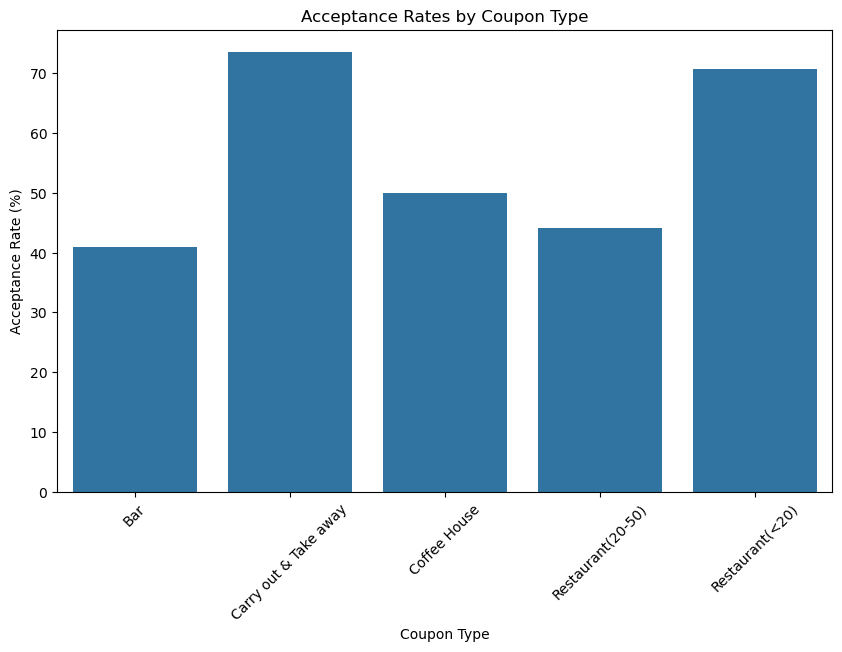

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate acceptance rates by coupon type
acceptance_rates = df.groupby('coupon')['Y'].mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.title('Acceptance Rates by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
plt.savefig('./plots/barplot_acceptance_rates.png')

As a further example let us now explore the relationship between coupon acceptance, age group and coupon type

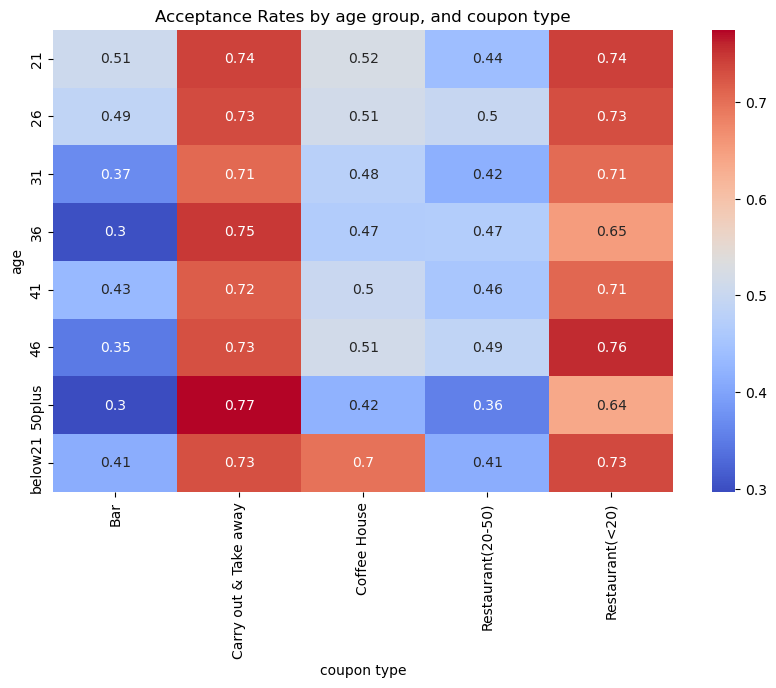

<Figure size 640x480 with 0 Axes>

In [ ]:
# Let us now explore the relationship between coupon acceptance, age group and coupon type
pivot_table = df.pivot_table(values='Y', index='age', columns='coupon', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Acceptance Rates by age group, and coupon type')
plt.xlabel('coupon type')
plt.ylabel('age')
plt.show()
plt.savefig('./plots/heatmap_age_coupon.png')

The data above shows that "carry out and takeaway" and cheap restaurant (Restaraunt < 20) coupons are way more popular than the other type of coupons across all age groups. The one exception is Coffee house coupons for the below21 age group, which are also very popular. 

Let us now explore how the acceptance rate varied depending upon when the coupon was handed out

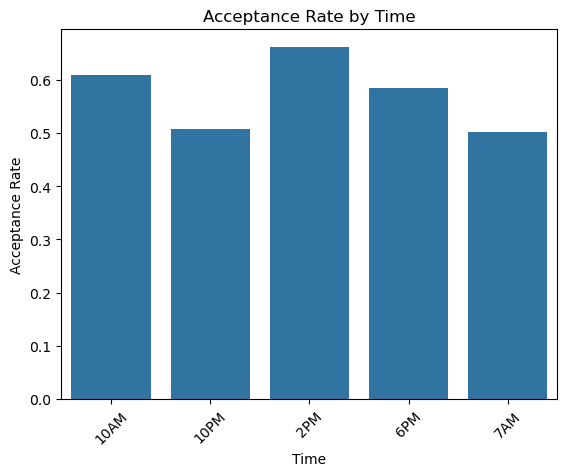

<Figure size 640x480 with 0 Axes>

In [ ]:
# Let us refine the above further to understand the acceptance rate of coupons by time. This is the % of
# coupons accepted in a given time period 
time_acceptance_rate = df.groupby('time')['Y'].mean().reset_index()
sns.barplot(x='time', y='Y', data=time_acceptance_rate)
plt.title('Acceptance Rate by Time')
plt.xlabel('Time')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)  
plt.show()
plt.savefig('./plots/barplot_acceptance_time.png')

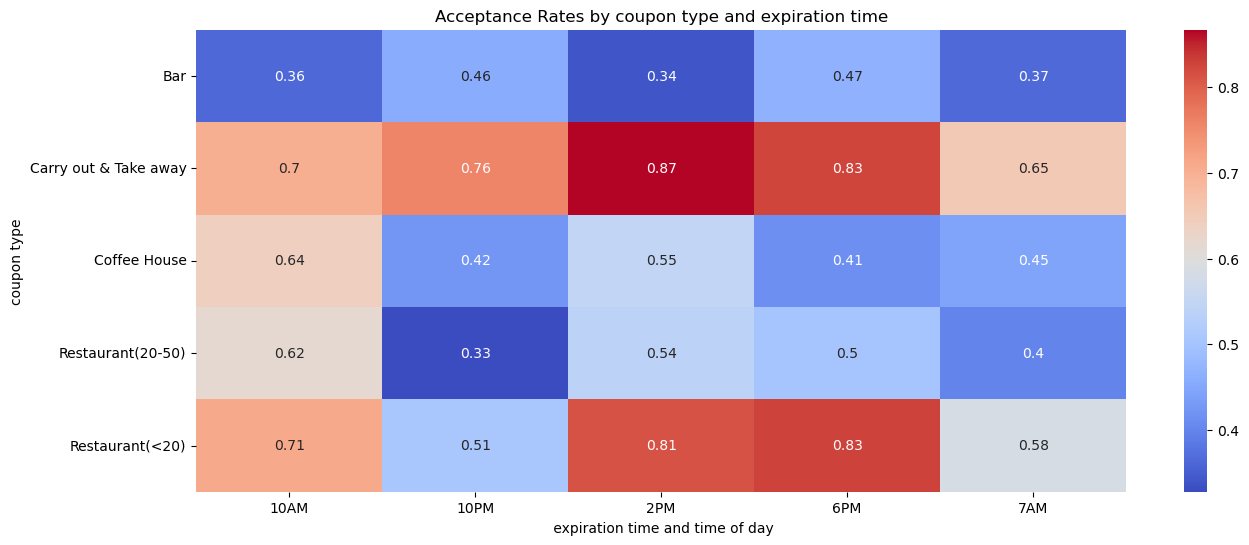

<Figure size 640x480 with 0 Axes>

In [ ]:
# let us explore the relationship between coupon type and time they were handed out
pivot_table = df.pivot_table(values='Y', index='coupon', columns=['time'], aggfunc='mean')
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Acceptance Rates by coupon type and expiration time')
plt.xlabel(' expiration time and time of day')
plt.ylabel('coupon type')
plt.show()
plt.savefig('./plots/heatmap_coupon_acceptance_timeofday')

#### Final Report

The examination of the data shows that more drivers are likely to accept the coupons than not (approx 55 %), in the aggregate

Regarding the type of coupons, the "the carry out and takeaway" and "cheap restuarant coupons" are signficantly popular than the other types of coupons and had higher acceptance rates.  Bar coupons were the least popular and had lower acceptance rates. This held across all age groups. Coffee house coupons were signicantly more popular with the under 21 crowd. Bar coupons had signficantly higher acceptance rate if the driver went to a bar more than once a month.

Coupons  in the aggregate had signficantly higher acceptance rates when given out at 2 pm, followed by 10 am, followed by 6 pm. But this also varied depending upon the type of coupon. Coffee house coupons fared better in the morning at 10 am. While the carry out and take away and cheap restaraunt coupons had better rates at 2 pm and 6 pm. Bar coupons fared better when given out at 6pm and 10 pm.

Drivers who are driving with friends and their destination is "no urgent place", are much more likely to accept coupons (67% vs global mean of 56.84%). On the other hand drivers who are driving their kids home, are much less likely to accept coupons (40%). They just want to get their kids home



